In [79]:
import numpy as np
import json
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import multivariate_normal
from scipy.stats import invwishart as iw
from data_fusion import Data_fusion
import matplotlib.pyplot as plt
import random
import json

In [83]:
RADIUS_GROUND_M = 6378 * 10**3
RADIUS_GPS_M = RADIUS_GROUND_M + 20180 * 10**3
RADIUS_GLONASS_M = RADIUS_GROUND_M + 19140 * 10**3
RADIUS_GALILEO_M = RADIUS_GROUND_M + 23222 * 10**3
r = [RADIUS_GROUND_M, RADIUS_GPS_M, RADIUS_GLONASS_M, RADIUS_GALILEO_M]

#this sample area only applies to robot & ground emitters
SAMPLE_AREA = 100

In [84]:
def fz(x, y, r):
    return np.sqrt(r**2-x**2-y**2)

def randomly_sample_point():
    x = random.randint(-SAMPLE_AREA*10**3, SAMPLE_AREA*10**3)
    y = random.randint(-SAMPLE_AREA*10**3, SAMPLE_AREA*10**3)
    return x, y

5647146.588631731
5880267.238877754
6200839.481602471
5771282.0102534415
5655240.654326922
5855025.788333899
26421608.475815017
26454321.583798118
26440275.668856025
26468461.551081866
26495038.6912716
26528106.315047424
25416919.23916681
25360928.408510424
25384634.20619549
25490509.85114668
25501295.356462188
25454245.820527703
29504239.46752788
29553447.976245277
29598452.142063696
29504780.188944843
29471201.74383181
29332716.05573802


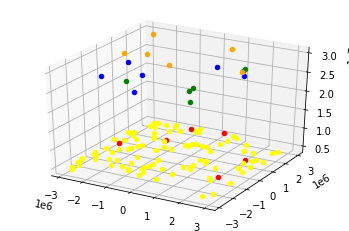

In [85]:
fig = plt.figure()
ax = plt.axes(projection='3d')

group_name = ["GROUND", "GPS", "GLONASS", "GALILEO"]
colors = ['red', 'blue', 'green', 'orange']

file_dict = {
    "technique":0,
    "emitters":{}
}


for j, radi in enumerate(r):
    group_dict = {
        "corr": np.random.rand(),
        "data": []
    }
    for i in range(6):
        x, y = randomly_sample_point()
        z = fz(x, y, radi)
        group_dict["data"].append([x,y,z])

        ax.scatter(x, y, z, color=colors[j])
        print(z)
    file_dict["emitters"][group_name[j]] = group_dict

with open("node_config.json", "w") as outfile: 
    json.dump(file_dict, outfile, indent=4)

robot_pose_dict = {
    "positions":[]
}

for i in range(100):
    x, y = randomly_sample_point()
    z = fz(x, y, RADIUS_GROUND_M + random.randint(0, 121))
    robot_pose_dict["positions"].append([x,y,z])

    ax.scatter(x, y, z, color='yellow')

with open("robot_poses.json", "w") as outfile: 
    json.dump(robot_pose_dict, outfile, indent=4)



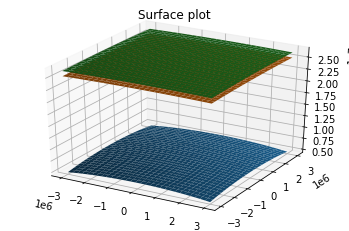

In [86]:
x = np.outer(np.linspace(-SAMPLE_AREA*10**3, SAMPLE_AREA*10**3, 30), np.ones(30))
y = x.copy().T # transpose
r = RADIUS_GROUND_M
z = np.sqrt(r**2-x**2-y**2)

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, z, edgecolor='none')

r = RADIUS_GLONASS_M
z = np.sqrt(r**2-x**2-y**2)
ax.plot_surface(x, y, z, edgecolor='none')

r = RADIUS_GPS_M
z = np.sqrt(r**2-x**2-y**2)
ax.plot_surface(x, y, z, edgecolor='none')


ax.set_title('Surface plot')
plt.show()

In [ ]:
#take the vector to the robot pose and then project vector to satellite onto robot pose and if thats negative discard